In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


4423680/4422102 [==============================] - 1s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28 * 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28 * 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28 * 28)

y_train = np.asarray(y_train, dtype=np.int64)
y_valid = np.asarray(y_valid, dtype=np.int64)
y_test = np.asarray(y_test, dtype=np.int64)

In [ ]:
def make_dataset(images, labels, epochs, batch_size, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs.batch(batch_size))
    return dataset

In [ ]:
batch_size = 20
epochs = 10
images_placeholder = tf.placeholder(tf.float64, [None, 28 * 28])
labels_placeholder = tf.placeholder(tf.int64, (None,))
dataset = make_dataset(images_placeholder, labels_placeholder,
                 epochs=epochs, batch_size=batch_size)
# 1. auto initialization
# 2. cannot be re-initialized. that is cannot revalue dataset
#     make_initializable_iterator can be re-initialized
dataset_itor = dataset.make_initializable_iterator()
x, y = dataset_itor.get_next()
with tf.Session() as sess:
    sess.run(dataset_iter.initializer,
            feed_dict={images_placeholder: x_train_scaled,
                      labels_placeholder: y_train})
    x_val, y_val = sess.run([x, y])
    print(x_val.shape)
    print(y_val.shape)
    sess.run(dataset_iter.initializer,
            feed_dict={images_placeholder: x_valid_scaled,
                      labels_placeholder: y_valid})
    x_val, y_val = sess.run([x, y])
    print(x_val.shape)
    print(y_val.shape)

In [ ]:
# session
init = tf.global_variables_initializer()
train_steps_per_epoch = x_train.shape[0] // batch_size


with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for step in range(train_steps_per_epoch):
            loss_val, accuracy, _ = sess.run([loss, accuracy, train_op],
           
            )
            print('\r[Train] epoch: %d, step: %d, loss: %3.5f, accuracy:%2.2f' % (epoch, step, loss_val, accuracy_val), end="")

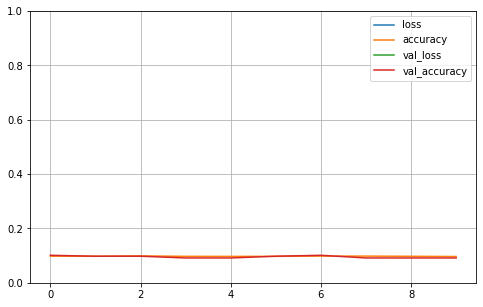

In [20]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8, 5])
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)